<h1>BitCoin Prediction</h1><br>
I analyzed the data from the below URL:<br>
https://www.kaggle.com/team-ai/bitcoin-price-prediction

In [260]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt

In [261]:
!pip install xlrd

In [262]:
train_df = pd.read_excel('bitcoin_price_transformed2.xlsx')
train_df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Open_Last_day,High_Last_day,Low_Last_day,...,Increase_Open_Last,Increase_High_Last,Increase_Low_Last,Increase_Close_Last,Incease_Volume_Last,Increase_Market_Last,Increase_Open,Year,Month,Day
0,2013-04-28,135.30,135.98,132.10,134.21,-,1500520000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,4,28
1,2013-04-29,134.44,147.49,134.00,144.54,-,1491160000,135.30,135.98,132.10,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.86,2013,4,29
2,2013-04-30,144.00,146.93,134.05,139.00,-,1597780000,134.44,147.49,134.00,...,-0.86,11.51,1.90,10.33,NaN,-9360000.0,9.56,2013,4,30
3,2013-05-01,139.00,139.89,107.72,116.99,-,1542820000,144.00,146.93,134.05,...,9.56,-0.56,0.05,-5.54,NaN,106620000.0,-5.00,2013,5,1
4,2013-05-02,116.38,125.60,92.28,105.21,-,1292190000,139.00,139.89,107.72,...,-5.00,-7.04,-26.33,-22.01,NaN,-54960000.0,-22.62,2013,5,2


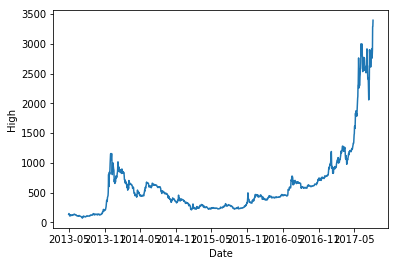

In [263]:
sns.lineplot('Date', 'High', data=train_df)

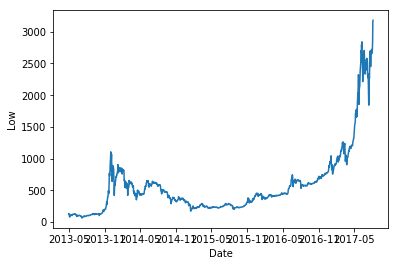

In [264]:
sns.lineplot('Date', 'Low', data=train_df)

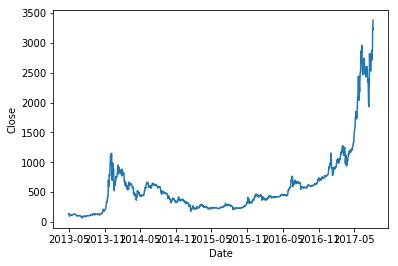

In [265]:
sns.lineplot('Date', 'Close', data=train_df)

In [266]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 23 columns):
Date                    1563 non-null datetime64[ns]
Open                    1563 non-null float64
High                    1563 non-null float64
Low                     1563 non-null float64
Close                   1563 non-null float64
Volume                  1563 non-null object
Market Cap              1563 non-null int64
Open_Last_day           1562 non-null float64
High_Last_day           1562 non-null float64
Low_Last_day            1562 non-null float64
Close_Last_day          1562 non-null float64
Market Cap Last         1562 non-null float64
Volume_Last_day         1562 non-null object
Increase_Open_Last      1561 non-null float64
Increase_High_Last      1561 non-null float64
Increase_Low_Last       1561 non-null float64
Increase_Close_Last     1561 non-null float64
Incease_Volume_Last     1318 non-null float64
Increase_Market_Last    1561 non-null float64
Increase_Open   

In [267]:
from dateutil.parser import parse
from datetime import datetime

def convert(date):
    holder = []
    for i in date:
        tp = parse(i).timestamp()
        dt = datetime.fromtimestamp(tp)
        holder.append(dt)
    return np.array(holder)

In [268]:
#date = train_df['Date'].values
#date_n = convert(date)

In [269]:
#train_df['Date'] = date_n
#train_df.head()

In [270]:
train_df = train_df.drop(index=[0,1]).reset_index().drop(columns='index')
train_df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Open_Last_day,High_Last_day,Low_Last_day,...,Increase_Open_Last,Increase_High_Last,Increase_Low_Last,Increase_Close_Last,Incease_Volume_Last,Increase_Market_Last,Increase_Open,Year,Month,Day
0,2013-04-30,144.00,146.93,134.05,139.00,-,1597780000,134.44,147.49,134.00,...,-0.86,11.51,1.90,10.33,NaN,-9360000.0,9.56,2013,4,30
1,2013-05-01,139.00,139.89,107.72,116.99,-,1542820000,144.00,146.93,134.05,...,9.56,-0.56,0.05,-5.54,NaN,106620000.0,-5.00,2013,5,1
2,2013-05-02,116.38,125.60,92.28,105.21,-,1292190000,139.00,139.89,107.72,...,-5.00,-7.04,-26.33,-22.01,NaN,-54960000.0,-22.62,2013,5,2
3,2013-05-03,106.25,108.13,79.10,97.75,-,1180070000,116.38,125.60,92.28,...,-22.62,-14.29,-15.44,-11.78,NaN,-250630000.0,-10.13,2013,5,3
4,2013-05-04,98.10,115.00,92.50,112.50,-,1089890000,106.25,108.13,79.10,...,-10.13,-17.47,-13.18,-7.46,NaN,-112120000.0,-8.15,2013,5,4


In [271]:
train_df = train_df.sort_values('Date').reset_index().drop(columns='index')
train_df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Open_Last_day,High_Last_day,Low_Last_day,...,Increase_Open_Last,Increase_High_Last,Increase_Low_Last,Increase_Close_Last,Incease_Volume_Last,Increase_Market_Last,Increase_Open,Year,Month,Day
0,2013-04-30,144.00,146.93,134.05,139.00,-,1597780000,134.44,147.49,134.00,...,-0.86,11.51,1.90,10.33,NaN,-9360000.0,9.56,2013,4,30
1,2013-05-01,139.00,139.89,107.72,116.99,-,1542820000,144.00,146.93,134.05,...,9.56,-0.56,0.05,-5.54,NaN,106620000.0,-5.00,2013,5,1
2,2013-05-02,116.38,125.60,92.28,105.21,-,1292190000,139.00,139.89,107.72,...,-5.00,-7.04,-26.33,-22.01,NaN,-54960000.0,-22.62,2013,5,2
3,2013-05-03,106.25,108.13,79.10,97.75,-,1180070000,116.38,125.60,92.28,...,-22.62,-14.29,-15.44,-11.78,NaN,-250630000.0,-10.13,2013,5,3
4,2013-05-04,98.10,115.00,92.50,112.50,-,1089890000,106.25,108.13,79.10,...,-10.13,-17.47,-13.18,-7.46,NaN,-112120000.0,-8.15,2013,5,4


In [272]:
#Convert blank Volume values from '-' to NAN
train_df['Volume'] = train_df['Volume'].replace('-', np.nan)
train_df['Volume'].unique()

array([        nan, 4.68627e+07, 3.25058e+07, ..., 1.94570e+09,
       1.10503e+09, 1.48228e+09])

In [273]:
#Convert blank Volume values from '-' to NAN
train_df['Volume_Last_day'] = train_df['Volume_Last_day'].replace('-', np.nan)
train_df['Volume_Last_day'].unique()

array([        nan, 4.68627e+07, 3.25058e+07, ..., 1.00212e+09,
       1.94570e+09, 1.10503e+09])

In [274]:
#Convert blank Volume values from '-' to NAN
train_df['Incease_Volume_Last'] = train_df['Incease_Volume_Last'].replace('-', np.nan)
train_df['Incease_Volume_Last'].unique()

array([         nan, -1.43569e+07, -1.34945e+07, ...,  1.97323e+08,
        9.43580e+08, -8.40670e+08])

In [275]:
train_df['Volume'].dtype

dtype('float64')

In [276]:
train_df['Volume_Last_day'].dtype

dtype('float64')

In [277]:
train_df['Incease_Volume_Last'].dtype

dtype('float64')

In [278]:
#train_df['Volume'].isnull()
pd.isna(0)

False

In [279]:
#train_df['Volume'] = train_df['Volume'].apply(lambda x: x if pd.isna(x) else np.float64(x.replace(',', '')))
#train_df.head()

In [280]:
#Convert Market Cap values into float values
#train_df['Market Cap'] = train_df['Market Cap'].apply(lambda x: np.float64(x.replace(',', '')))
#train_df.head()

In [281]:
train_df

,Date,Open,High,Low,Close,Volume,Market Cap,Open_Last_day,High_Last_day,Low_Last_day,...,Increase_Open_Last,Increase_High_Last,Increase_Low_Last,Increase_Close_Last,Incease_Volume_Last,Increase_Market_Last,Increase_Open,Year,Month,Day
0,2013-04-30,144.00,146.93,134.05,139.00,NaN,1597780000,134.44,147.49,134.00,...,-0.86,11.51,1.90,10.33,NaN,-9.360000e+06,9.56,2013,4,30
1,2013-05-01,139.00,139.89,107.72,116.99,NaN,1542820000,144.00,146.93,134.05,...,9.56,-0.56,0.05,-5.54,NaN,1.066200e+08,-5.00,2013,5,1
2,2013-05-02,116.38,125.60,92.28,105.21,NaN,1292190000,139.00,139.89,107.72,...,-5.00,-7.04,-26.33,-22.01,NaN,-5.496000e+07,-22.62,2013,5,2
3,2013-05-03,106.25,108.13,79.10,97.75,NaN,1180070000,116.38,125.60,92.28,...,-22.62,-14.29,-15.44,-11.78,NaN,-2.506300e+08,-10.13,2013,5,3
4,2013-05-04,98.10,115.00,92.50,112.50,NaN,1089890000,106.25,108.13,79.10,...,-10.13,-17.47,-13.18,-7.46,NaN,-1.121200e+08,-8.15,2013,5,4
5,2013-05-05,112.90,118.80,107.14,115.91,NaN,1254760000,98.10,115.00,92.50,...,-8.15,6.87,13.40,14.75,NaN,-9.018000e+07,14.80,2013,5,5
6,2013-05-06,115.98,124.66,106.64,112.30,NaN,1289470000,112.90,118.80,107.14,...,14.80,3.80,14.64,3.41,NaN,1.648700e+08,3.08,2013,5,6
7,2013-05-07,112.25,113.44,97.70,111.50,NaN,1248470000,115.98,124.66,106.64,...,3.08,5.86,-0.50,-3.61,NaN,3.471000e+07,-3.73,2013,5,7
8,2013-05-08,109.60,115.78,109.60,113.57,NaN,1219450000,112.25,113.44,97.70,...,-3.73,-11.22,-8.94,-0.80,NaN,-4.100000e+07,-2.65,2013,5,8
9,2013-05-09,113.20,113.46,109.26,112.67,NaN,1259980000,109.60,115.78,109.60,...,-2.65,2.34,11.90,2.07,NaN,-2.902000e+07,3.60,2013,5,9


In [282]:
target_date_arr = train_df[train_df['Date'] >= date(2017, 8, 1)]['Date'].values
target_date_arr

/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


array(['2017-08-01T00:00:00.000000000', '2017-08-02T00:00:00.000000000',
       '2017-08-03T00:00:00.000000000', '2017-08-04T00:00:00.000000000',
       '2017-08-05T00:00:00.000000000', '2017-08-06T00:00:00.000000000',
       '2017-08-07T00:00:00.000000000'], dtype='datetime64[ns]')

In [283]:
import lightgbm
import xgboost

In [284]:
#特定の日に対してモデルをtrainする関数
def train_model(target_date, targ):
    model = xgboost.XGBRegressor()
    #model = lightgbm.LGBMRegressor(n_estimators=100, max_depth=1)
    target_date = pd.to_datetime(target_date)
    train_df_for_model = train_df[train_df['Date'] <=  date(target_date.year, target_date.month, target_date.day)]
    X = train_df_for_model.drop(columns=['High', 'Low', 'Close', 'Volume', 'Market Cap'])
    y = train_df_for_model[['Date', targ]]
    X_train = X[X['Date']<date(target_date.year, target_date.month, target_date.day)]
    y_train = y[y['Date']<date(target_date.year, target_date.month, target_date.day)]
    
    X_test = X[X['Date']==date(target_date.year, target_date.month, target_date.day)]
    y_test = y[y['Date']==date(target_date.year, target_date.month, target_date.day)]
    
    X_train = X_train.drop(columns='Date')
    y_train = y_train.drop(columns='Date')
    X_test = X_test.drop(columns='Date')
    y_test = y_test.drop(columns='Date')
    
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(prediction)
    prediction = prediction[0]
    
    return prediction

In [285]:
target_lst = ['High', 'Low', 'Close']
goal_dict = dict()
for targ in target_lst:
    predict_lst = []
    for target_date in target_date_arr:
        #モデルのtrain
         predict_lst.append(train_model(target_date, targ))
    goal_dict[targ] = predict_lst

/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  if __name__ == '__main__':
/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will

[17:33:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[2824.7615]
[17:33:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[2852.4592]
[17:33:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[2821.8982]
[17:33:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  if __name__ == '__main__':
/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will

[2835.2065]
[17:33:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[2919.729]
[17:33:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  if __name__ == '__main__':
/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will

[2999.2112]
[17:33:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[3182.1597]
[17:33:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  if __name__ == '__main__':
/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will

[2688.423]
[17:33:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[2708.1973]
[17:33:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  if __name__ == '__main__':
/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will

[2642.8367]
[17:33:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[2678.4783]
[17:33:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  if __name__ == '__main__':
/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will

[2701.1335]
[17:33:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[2687.6453]
[17:33:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  if __name__ == '__main__':
/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will

[2867.9968]
[17:33:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[2748.1487]
[17:33:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  if __name__ == '__main__':
/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will

[2838.4749]
[17:33:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[2700.4448]
[17:33:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  if __name__ == '__main__':
/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will

[2702.281]
[17:33:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[2817.2432]
[17:33:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  if __name__ == '__main__':
/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will

[2742.2405]
[17:33:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[2887.8887]


/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  if __name__ == '__main__':
/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will

In [286]:
pd.to_datetime(target_date_arr[0])

Timestamp('2017-08-01 00:00:00')

In [287]:
predict_lst

[2748.1487, 2838.4749, 2700.4448, 2702.281, 2817.2432, 2742.2405, 2887.8887]

In [288]:
predict_lst

[2748.1487, 2838.4749, 2700.4448, 2702.281, 2817.2432, 2742.2405, 2887.8887]

In [289]:
goal_dict

{'Close': [2748.1487,
  2838.4749,
  2700.4448,
  2702.281,
  2817.2432,
  2742.2405,
  2887.8887],
 'High': [2824.7615,
  2852.4592,
  2821.8982,
  2835.2065,
  2919.729,
  2999.2112,
  3182.1597],
 'Low': [2688.423,
  2708.1973,
  2642.8367,
  2678.4783,
  2701.1335,
  2687.6453,
  2867.9968]}

In [290]:
result_df = pd.DataFrame(goal_dict)
result_df = result_df.rename(columns = {'High': 'High_pred', 'Low': 'Low_pred', 'Close': 'Close_pred'})
result_df

,High_pred,Low_pred,Close_pred
0,2824.761475,2688.423096,2748.148682
1,2852.459229,2708.197266,2838.474854
2,2821.898193,2642.836670,2700.444824
3,2835.206543,2678.478271,2702.281006
4,2919.729004,2701.133545,2817.243164
5,2999.211182,2687.645264,2742.240479
6,3182.159668,2867.996826,2887.888672


In [291]:
train_agg = train_df.tail(7)[['Date', 'Open', 'High', 'Low', 'Close']].reset_index().drop(columns='index')
merged_df = pd.concat([train_agg, result_df], axis=1)
merged_df

,Date,Open,High,Low,Close,High_pred,Low_pred,Close_pred
0,2017-08-01,2871.30,2921.35,2685.61,2718.26,2824.761475,2688.423096,2748.148682
1,2017-08-02,2727.13,2762.53,2668.59,2710.67,2852.459229,2708.197266,2838.474854
2,2017-08-03,2709.56,2813.31,2685.14,2804.73,2821.898193,2642.836670,2700.444824
3,2017-08-04,2806.93,2899.33,2743.72,2895.89,2835.206543,2678.478271,2702.281006
4,2017-08-05,2897.63,3290.01,2874.83,3252.91,2919.729004,2701.133545,2817.243164
5,2017-08-06,3257.61,3293.29,3155.60,3213.94,2999.211182,2687.645264,2742.240479
6,2017-08-07,3212.78,3397.68,3180.89,3378.94,3182.159668,2867.996826,2887.888672


Text(0.5,1,'Gap between actual and predicted HIgh value')

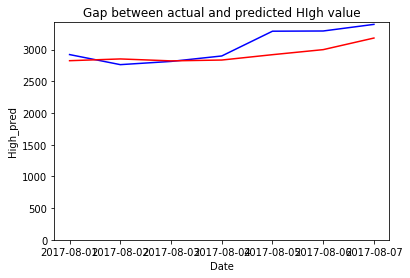

In [292]:
#Plotting to compare actual value and predicted value of High values
fig = plt.figure()
fig = sns.lineplot(x='Date', y='High', data=merged_df, color='blue')
fig = sns.lineplot(x='Date', y='High_pred', data=merged_df, color='red')
fig.axes.set_ylim(0)
fig.axes.set_title('Gap between actual and predicted HIgh value')

Text(0.5,1,'Gap between actual and predicted Low value')

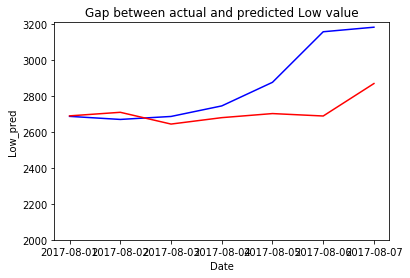

In [293]:
#Plotting to compare actual value and predicted value of High values
fig = plt.figure()
fig = sns.lineplot(x='Date', y='Low', data=merged_df, color='blue')
fig = sns.lineplot(x='Date', y='Low_pred', data=merged_df, color='red')
fig.axes.set_ylim(2000)
fig.axes.set_title('Gap between actual and predicted Low value')

(0, 3412.8647587890628)

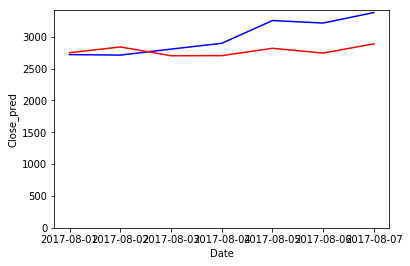

In [294]:
#Plotting to compare actual value and predicted value of Open
fig = plt.figure()
fig = sns.lineplot(x='Date', y='Close', data=merged_df, color='blue')
fig = sns.lineplot(x='Date', y='Close_pred', data=merged_df, color='red')
fig.axes.set_ylim(0)

In [295]:
train_df.corr().sort_values('High')

,Open,High,Low,Close,Volume,Market Cap,Open_Last_day,High_Last_day,Low_Last_day,Close_Last_day,...,Increase_Open_Last,Increase_High_Last,Increase_Low_Last,Increase_Close_Last,Incease_Volume_Last,Increase_Market_Last,Increase_Open,Year,Month,Day
Month,-0.090787,-0.088460,-0.092289,-0.088933,-0.042263,-0.088865,-0.092670,-0.090244,-0.094243,-0.090910,...,0.018122,0.017423,0.018073,0.017123,-0.001438,0.014358,0.017135,-0.298686,1.000000,0.006564
Day,-0.009087,-0.009140,-0.008803,-0.008917,-0.008867,-0.008376,-0.008625,-0.008286,-0.009427,-0.009086,...,-0.007843,-0.022615,0.001818,-0.008321,-0.027564,-0.010150,-0.007394,-0.014278,0.006564,1.000000
Incease_Volume_Last,0.011998,0.009499,0.009403,0.005940,0.070783,0.012177,0.001378,0.020998,-0.004459,0.010924,...,0.004697,0.476181,-0.293280,0.130301,1.000000,0.004238,0.155105,0.010717,-0.001438,-0.027564
Increase_Open,0.136628,0.135067,0.139739,0.133976,0.137946,0.135688,0.066174,0.103026,0.107775,0.136197,...,-0.020387,0.581101,0.589164,0.996507,0.155105,-0.022277,1.000000,0.055857,0.017135,-0.007394
Increase_Close_Last,0.137177,0.135683,0.140078,0.134637,0.137887,0.136239,0.066977,0.103523,0.108842,0.136994,...,-0.012750,0.575539,0.600639,1.000000,0.130301,-0.015152,0.996507,0.056069,0.017123,-0.008321
Increase_Open_Last,0.139017,0.138762,0.141377,0.139030,0.155309,0.138122,0.141481,0.140055,0.144775,0.139133,...,1.000000,0.487114,0.469640,-0.012750,0.004697,0.993052,-0.020387,0.057051,0.018122,-0.007843
Increase_High_Last,0.143325,0.140825,0.140135,0.135290,0.180312,0.142325,0.102848,0.138157,0.125002,0.142790,...,0.487114,1.000000,0.420704,0.575539,0.476181,0.476800,0.581101,0.058097,0.017423,-0.022615
Increase_Low_Last,0.142232,0.143667,0.147485,0.143755,0.140057,0.141000,0.101172,0.115478,0.142390,0.142348,...,0.469640,0.420704,1.000000,0.600639,-0.293280,0.476409,0.589164,0.057616,0.018073,0.001818
Increase_Market_Last,0.147671,0.147751,0.150627,0.148222,0.159864,0.147433,0.150333,0.148724,0.153721,0.147788,...,0.993052,0.476800,0.476409,-0.015152,0.004238,1.000000,-0.022277,0.064166,0.014358,-0.010150
Year,0.591520,0.583759,0.601130,0.591097,0.547498,0.637571,0.591820,0.584042,0.601631,0.591614,...,0.057051,0.058097,0.057616,0.056069,0.010717,0.064166,0.055857,1.000000,-0.298686,-0.014278
